In [30]:
import numpy as np
import os
import pandas as pd

In [5]:
path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files'

In [7]:
files=os.listdir(path)
print(files)

['Lederberg_2017-12-09.tar', 'Cori_2016-12-14.tar', 'Cori_2016-12-17.tar', 'Cori_2016-12-18.tar', 'Forssmann_2017-11-01.tar', 'Forssmann_2017-11-02.tar', 'Forssmann_2017-11-04.tar', 'Forssmann_2017-11-05.tar', 'Hench_2017-06-15.tar', 'Hench_2017-06-16.tar', 'Hench_2017-06-17.tar', 'Hench_2017-06-18.tar', 'Lederberg_2017-12-05.tar', 'Lederberg_2017-12-06.tar', 'Lederberg_2017-12-07.tar', 'Lederberg_2017-12-08.tar', 'Lederberg_2017-12-10.tar', 'Lederberg_2017-12-11.tar', 'Moniz_2017-05-15.tar', 'Moniz_2017-05-16.tar', 'Moniz_2017-05-18.tar', 'Muller_2017-01-07.tar', 'Muller_2017-01-08.tar', 'Muller_2017-01-09.tar', 'Radnitz_2017-01-08.tar', 'Radnitz_2017-01-09.tar', 'Radnitz_2017-01-10.tar', 'Radnitz_2017-01-11.tar', 'Radnitz_2017-01-12.tar', 'Richards_2017-10-29.tar', 'Richards_2017-10-30.tar', 'Richards_2017-10-31.tar', 'Richards_2017-11-01.tar', 'Richards_2017-11-02.tar', 'Tatum_2017-12-06.tar', 'Tatum_2017-12-07.tar', 'Tatum_2017-12-08.tar', 'Tatum_2017-12-09.tar', 'Theiler_2017-10-1

In [34]:
selected_recording='Richards_2017-10-31.tar'

midbrain_area='SCs'
frontal_area='MOs'

In [9]:
path_to_rec=path+'/'+selected_recording

In [27]:
spk_tms=np.load(path_to_rec+'/'+'spikes.times.npy')
spk_amps=np.load(path_to_rec+'/'+'spikes.amps.npy')
spk_clusters=np.load(path_to_rec+'/'+'spikes.clusters.npy')
clust_brain_id=np.load(path_to_rec+'/'+'clusters.originalIDs.npy')
#brain_id=np.load(path_to_rec+'/'+'channels.sitePositions.npy')

In [32]:
def probes_loc_one_file(one_mouse_folder):
    path='/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/unzipped_files/'
    dat=pd.read_csv(path+one_mouse_folder+'/'+'channels.brainLocation.tsv', sep='\t')
    #dat['Mouse_Folder'] =str(one_mouse_folder)
    return dat
locs=probes_loc_one_file(selected_recording)
print(locs.shape)

(748, 4)


In [36]:
print(locs[locs['allen_ontology']==midbrain_area])

     ccf_ap  ccf_dv  ccf_lr allen_ontology
618  9376.0  1899.6  4883.1            SCs
619  9408.0  1899.6  4883.1            SCs
620  9392.0  1880.3  4877.9            SCs
621  9424.0  1880.3  4877.9            SCs
622  9376.0  1860.9  4872.7            SCs
..      ...     ...     ...            ...
679  9424.0  1300.7  4722.6            SCs
680  9376.0  1281.4  4717.4            SCs
681  9408.0  1281.4  4717.4            SCs
682  9392.0  1262.1  4712.2            SCs
683  9424.0  1262.1  4712.2            SCs

[66 rows x 4 columns]


In [37]:
print(locs[locs['allen_ontology']==frontal_area])

     ccf_ap  ccf_dv  ccf_lr allen_ontology
110  2670.7  2760.5  5004.7            MOs
111  2708.3  2741.2  4974.4            MOs
112  2685.7  2741.2  4997.0            MOs
113  2700.7  2721.8  4989.4            MOs
114  2678.1  2721.8  5012.0            MOs
..      ...     ...     ...            ...
215  2891.0  1717.3  5179.7            MOs
216  2868.4  1717.3  5202.3            MOs
217  2906.0  1698.0  5172.0            MOs
218  2883.4  1698.0  5194.7            MOs
219  2898.3  1678.6  5187.0            MOs

[110 rows x 4 columns]


In [38]:
choose_neuron_0=618
choose_neuron_1=111

In [70]:
def extract_spike_train(choose_neuron,spk_clusters,spk_tms):
    spk_ids=np.where(spk_clusters==choose_neuron)
    spk_tms_one_neuron=spk_tms[spk_ids]
    print(spk_tms_one_neuron)
    return spk_tms_one_neuron
n0_times=extract_spike_train(choose_neuron_0,spk_clusters,spk_tms)
n1_times=extract_spike_train(choose_neuron_1,spk_clusters,spk_tms)

[1.83817219e+00 2.51670864e+00 2.60207570e+00 ... 2.59968078e+03
 2.63170536e+03 2.86753147e+03]
[2.36523333e+00 3.48346667e+00 3.86693333e+00 ... 2.96573793e+03
 2.96589797e+03 2.96595787e+03]


(1, 296827)


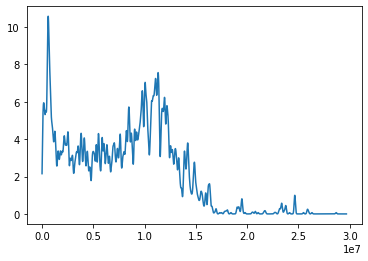

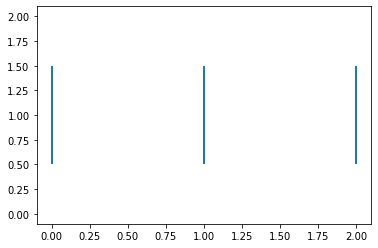

In [117]:
import elephant.conversion as conv
import neo 
import quantities as pq
from elephant.statistics import instantaneous_rate
import neo
from quantities import Hz, s, ms

#https://elephant.readthedocs.io/en/latest/reference/conversion.html

final_timepoint=spk_tms[-1]
def bin_and_rate_spikes(spk_times,bin_time,final_time_point):
    spk_tr=neo.SpikeTrain(spk_times*pq.s, t_stop=final_time_point)
    r=instantaneous_rate(spk_tr, sampling_period=0.001*s, kernel='auto', cutoff=5.0)
    binned = conv.BinnedSpikeTrain(spk_tr, binsize=bin_time * pq.s,t_start=0 * pq.s).to_array()
    return r, binned

bin_time=0.1
r_0,binned_0=bin_and_rate_spikes(n0_times,bin_time,final_time_point)
print(binned_0.shape)
import matplotlib.pyplot as plt

plt.plot(r_0)
plt.show()
plt.eventplot(binned_0)
plt.show()

In [ ]:
print()

In [ ]:
import elephant.conversion as conv
import neo as n
import quantities as pq
a = n.SpikeTrain(b* pq.s,
                 t_stop=10.0 * pq.s)
x = conv.BinnedSpikeTrain(a, num_bins=10, binsize=1 * pq.s,
                          t_start=0 * pq.s)